# __Assisted Practice__

## __Problem Statement:__
A botanical research team is conducting a comprehensive analysis of iris flowers, aiming to derive valuable insights from their characteristics. The team wants to explore feature engineering techniques to better understand and visualize the relationships within the Iris dataset.
## __Steps to Perform:__
- Understand the Dataset: Get familiar with the Iris dataset and its features


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Datasets/Iris.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [2]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


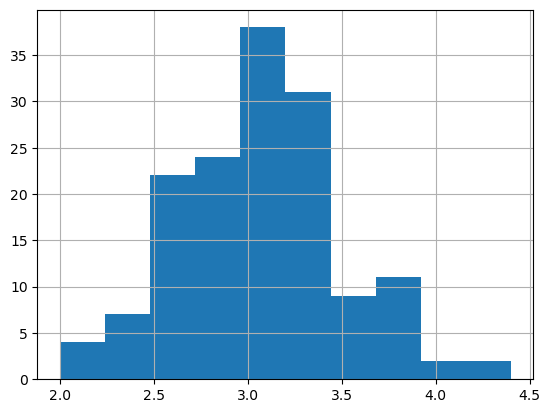

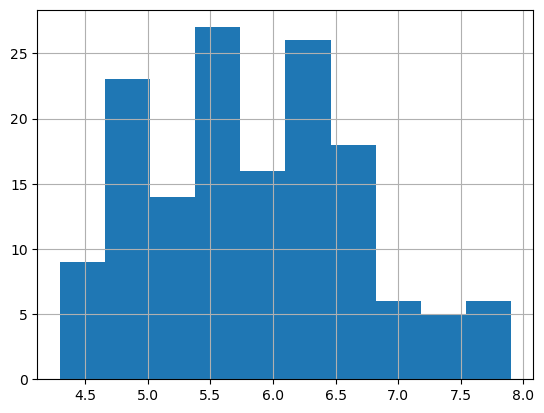

In [4]:
df['sepal_width'].hist()
plt.show()
df['sepal_length'].hist()
plt.show()

In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

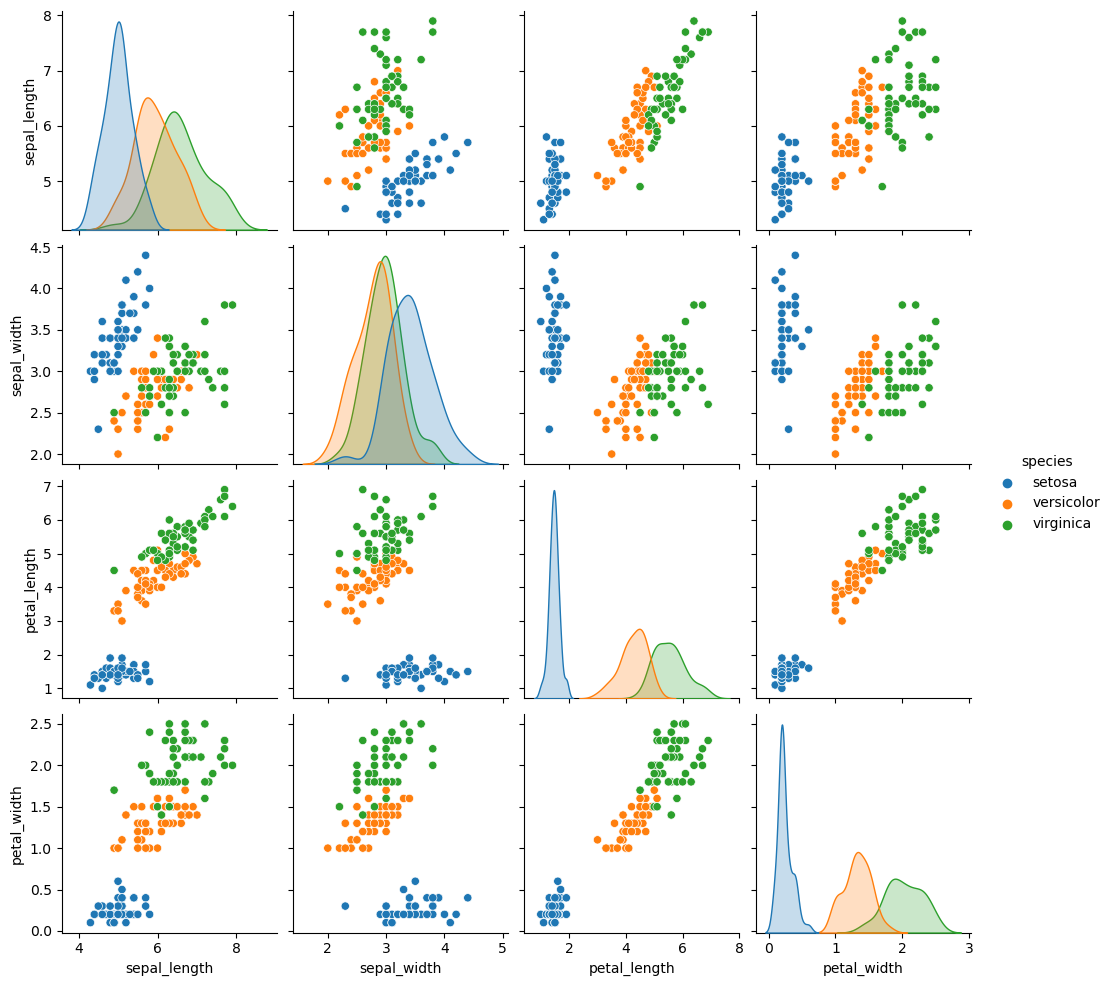

In [6]:
sns.pairplot(data=df, hue='species')
plt.show

- Engineer Features: Create new features like sepal area and petal area


In [7]:
#Create a new features
df['sepal_area'] = df['sepal_length']*df['sepal_width']
df['petal_area'] = df['petal_length']*df['petal_width']

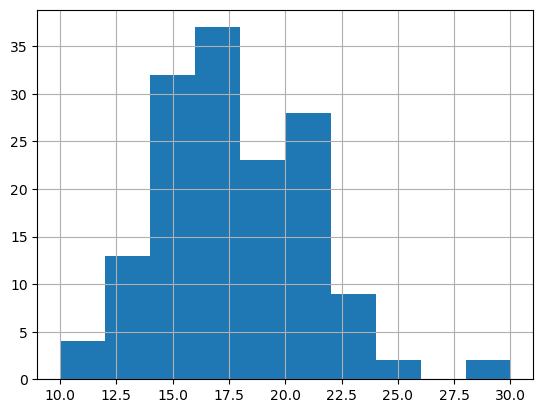

In [8]:
df['sepal_area'].hist()
plt.show()

In [9]:
df.corr()

ValueError: could not convert string to float: 'setosa'

- Transform Variables: If the features are not normally distributed, apply transformations

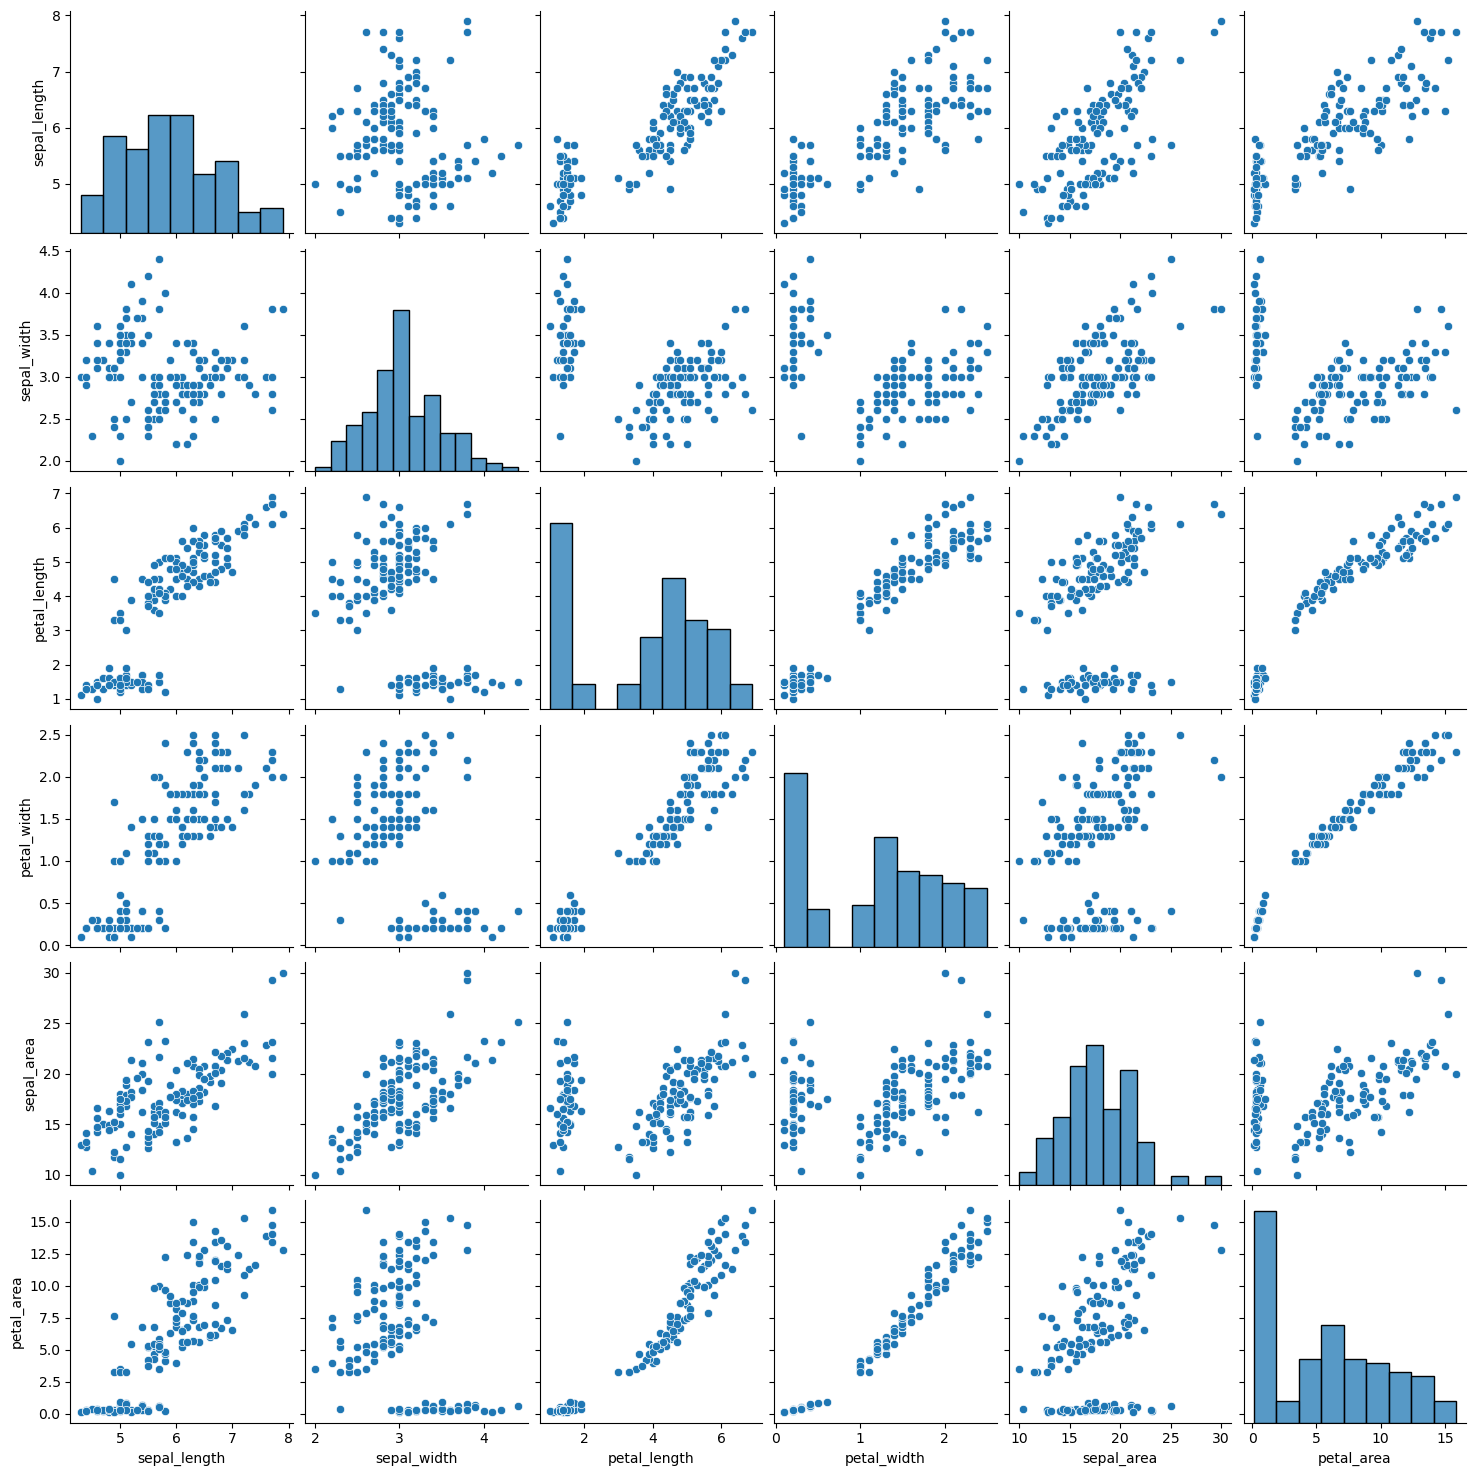

In [ ]:
#Check if data is normally distributed
sns.pairplot(data=df)

Some of the data is NOT normally distributed. For example, petal_area. Let's fix that!

In [ ]:
from scipy.stats import boxcox

# Applying Box-Cox transformation to 'sqft_living' variable
# the _ means we are ignoring that output variable.
df['boxbox_petal_area'], _ = boxcox(df['petal_area'])

# Displaying the DataFrame with the Box-Cox transformed 'sqft_living' variable
print("DataFrame with box-cox transformed sqft_living:")
print(df[['petal_area', 'boxbox_petal_area']])

DataFrame with box-cox transformed sqft_living:
     petal_area  boxbox_petal_area
0          0.28          -1.001169
1          0.28          -1.001169
2          0.26          -1.045412
3          0.30          -0.958802
4          0.28          -1.001169
..          ...                ...
145       11.96           4.207839
146        9.50           3.622932
147       10.40           3.846535
148       12.42           4.308861
149        9.18           3.540344

[150 rows x 2 columns]


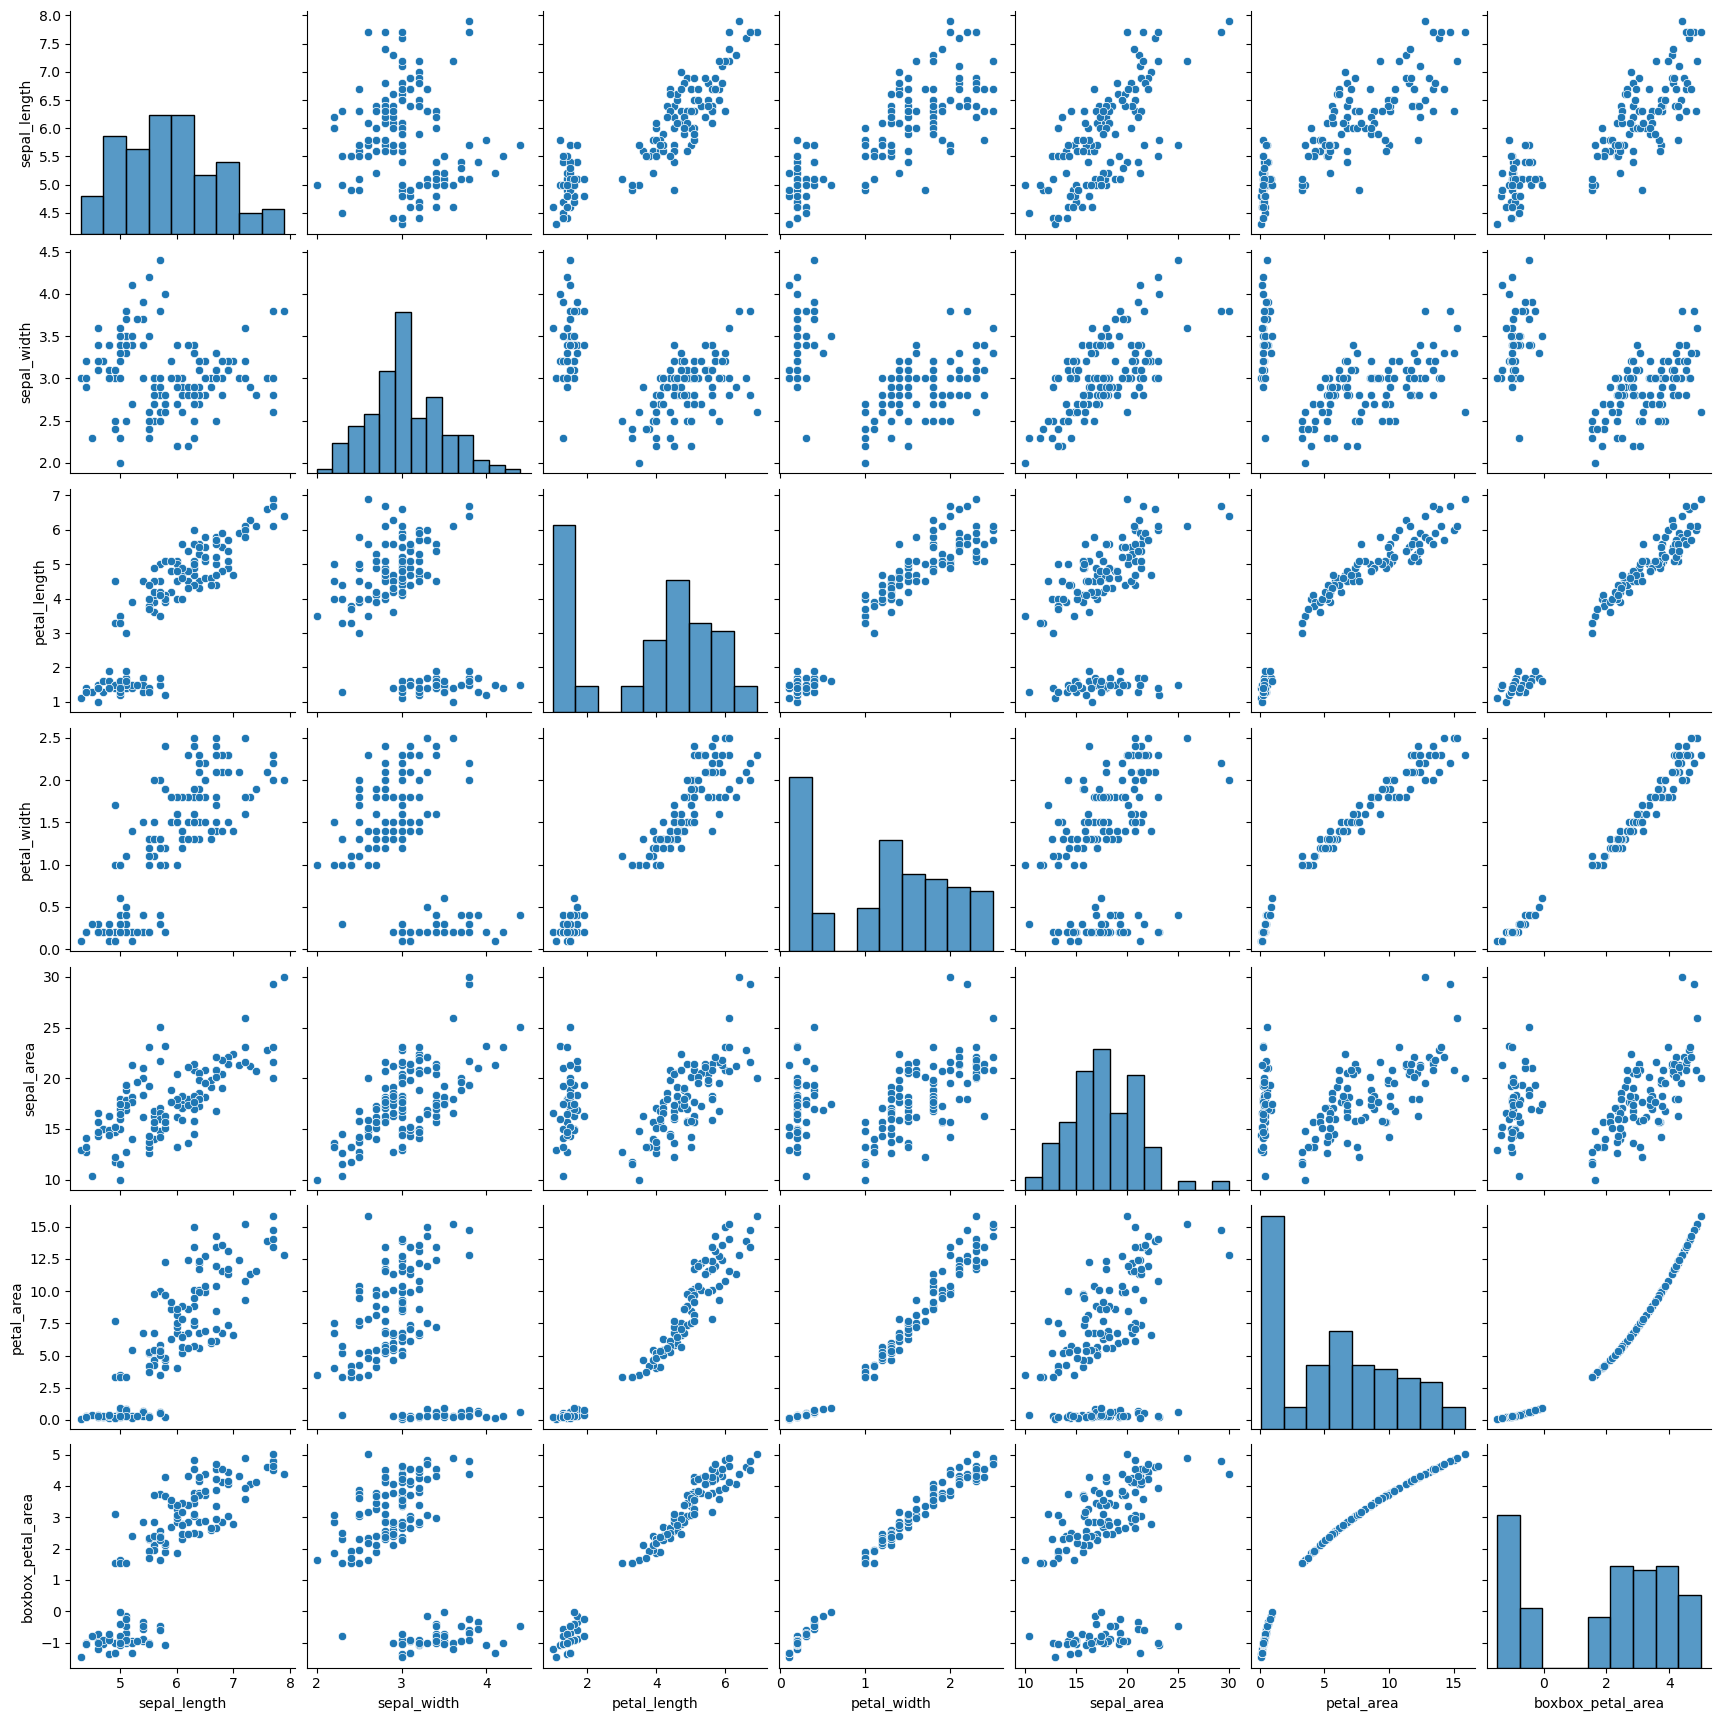

In [ ]:
#Check if data is normally distributed
sns.pairplot(data=df)

We need to try other data transformation techniques to normalize the distribution because the boxcox did not worked.
For example:
square root, etc.


- Scale Features: Use Min-Max Scaling or standard scaling to scale the features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['sepal_length', 'sepal_width', 'petal_area']] = scaler.fit_transform(df[['sepal_length', 'sepal_width', 'petal_area']])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,boxbox_petal_area
0,0.222222,0.625000,1.4,0.2,setosa,17.85,0.010787,-1.001169
1,0.166667,0.416667,1.4,0.2,setosa,14.70,0.010787,-1.001169
2,0.111111,0.500000,1.3,0.2,setosa,15.04,0.009518,-1.045412
3,0.083333,0.458333,1.5,0.2,setosa,14.26,0.012056,-0.958802
4,0.194444,0.666667,1.4,0.2,setosa,18.00,0.010787,-1.001169


- Encode Labels: Convert the categorical data (species) into numerical data using label encoding

- One Hot Encoding: Apply one hot encoding on the species feature and compare with label encoding

In [ ]:
one_hot = pd.get_dummies(df, columns=['species'], prefix='iris')
one_hot

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,boxbox_petal_area,iris_setosa,iris_versicolor,iris_virginica
0,0.222222,0.625000,1.4,0.2,17.85,0.010787,-1.001169,True,False,False
1,0.166667,0.416667,1.4,0.2,14.70,0.010787,-1.001169,True,False,False
2,0.111111,0.500000,1.3,0.2,15.04,0.009518,-1.045412,True,False,False
3,0.083333,0.458333,1.5,0.2,14.26,0.012056,-0.958802,True,False,False
4,0.194444,0.666667,1.4,0.2,18.00,0.010787,-1.001169,True,False,False
...,...,...,...,...,...,...,...,...,...,...
145,0.666667,0.416667,5.2,2.3,20.10,0.751904,4.207839,False,False,True
146,0.555556,0.208333,5.0,1.9,15.75,0.595812,3.622932,False,False,True
147,0.611111,0.416667,5.2,2.0,19.50,0.652919,3.846535,False,False,True
148,0.527778,0.583333,5.4,2.3,21.08,0.781091,4.308861,False,False,True
